In [1]:
import nltk
from nltk.corpus import movie_reviews
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download the movie reviews dataset
nltk.download("movie_reviews")

# Load the dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the dataset
random.shuffle(documents)

# Display basic information
print(f"Number of Documents: {len(documents)}")
print(f"Sample Document: {documents[0]}")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/astane/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Number of Documents: 2000
Sample Document: (['"', 'with', 'all', 'that', 'education', ',', 'you', 'should', 'know', 'what', 'happiness', 'is', '.', '"', 'starring', 'sylvia', 'chang', ',', 'teresa', 'hu', ',', 'hsu', 'ming', ',', 'li', 'lieh', ',', 'mao', 'hsueh', '-', 'wei', ';', 'directed', 'by', 'edward', 'yang', ';', 'written', 'by', 'yang', 'and', 'wu', 'nien', '-', 'chen', ';', 'cinematography', 'by', 'christopher', 'doyle', 'and', 'chang', 'hui', '-', 'kung', 'every', 'country', 'has', ',', 'eventually', ',', 'its', 'new', 'wave', '.', 'france', 'had', 'its', 'nouvelle', 'vague', ',', 'brazil', 'its', 'cinema', 'novo', ',', 'china', 'its', 'fifth', 'generation', ',', 'and', 'on', 'and', 'on', '.', 'some', 'waves', 'just', 'take', 'longer', 'than', 'others', ',', 'before', 'they', 'wash', 'over', 'us', ',', 'cleansing', 'us', 'with', 'the', 'balm', 'of', 'discovery', '.', 'taiwan', "'", 's', 'new', 'wave', 'came', 'in', 'the', '1980s', ',', 'in', 'the', 'work', 'of', 'directors',

In [3]:
# Extract text and labels
texts = [" ".join(words) for words, label in documents]
labels = [label for words, label in documents]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 1600
Testing Set Size: 400


In [4]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words="english", max_features=2000)

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

print(f"Number of Features: {len(vectorizer.get_feature_names_out())}")

Number of Features: 2000


In [6]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Transform the test data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)

# Train the model
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_vectorized)

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

         neg       0.78      0.82      0.80       199
         pos       0.81      0.77      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.79       400



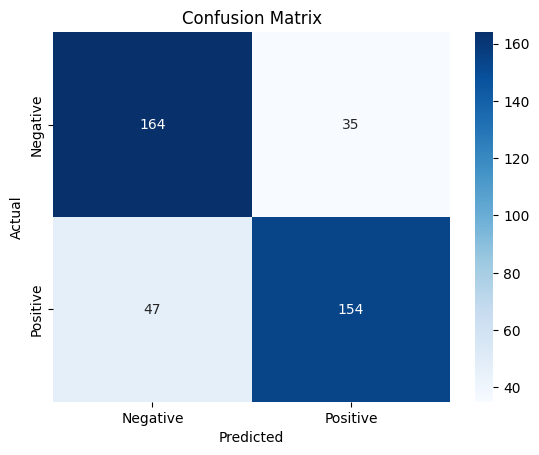

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Top Negative Words: ['plot' 'story' 'character' 'bad' 'good' 'time' 'just' 'like' 'movie'
 'film']
Top Positive Words: ['characters' 'life' 'character' 'story' 'time' 'good' 'just' 'like'
 'movie' 'film']


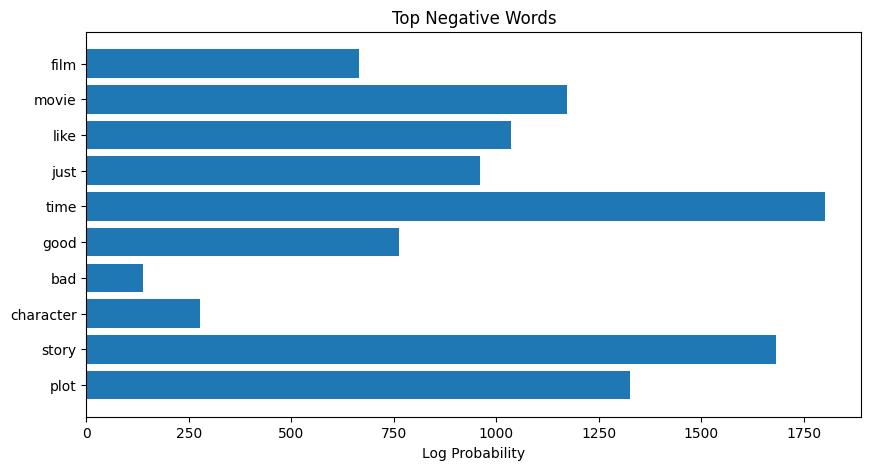

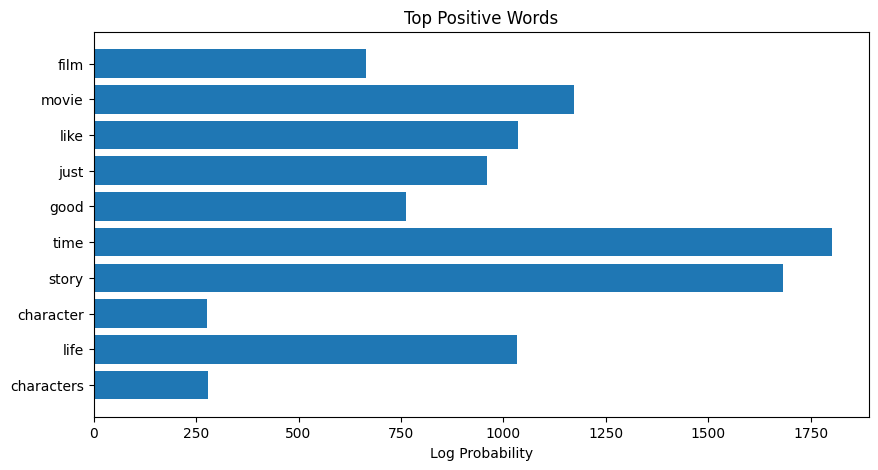

In [8]:
# Get feature names and their corresponding log probabilities
feature_names = vectorizer.get_feature_names_out()
class_log_probs = nb_classifier.feature_log_prob_

# Top 10 words for each class
top_negative_words = feature_names[class_log_probs[0].argsort()[-10:]]
top_positive_words = feature_names[class_log_probs[1].argsort()[-10:]]

print("Top Negative Words:", top_negative_words)
print("Top Positive Words:", top_positive_words)

# Visualize the top words
plt.figure(figsize=(10, 5))
plt.barh(top_negative_words, class_log_probs[0].argsort()[-10:])
plt.title("Top Negative Words")
plt.xlabel("Log Probability")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_positive_words, class_log_probs[1].argsort()[-10:])
plt.title("Top Positive Words")
plt.xlabel("Log Probability")
plt.show()

### Naive Bayes Algorithm in NLP

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It is widely used in Natural Language Processing (NLP) tasks such as text classification, sentiment analysis, and spam detection due to its simplicity and effectiveness.

#### Bayes' Theorem
Bayes' Theorem provides a way to calculate the probability of a hypothesis (class) given some evidence (features). It is expressed as:

\[
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
\]

Where:
- \(P(C|X)\): Posterior probability of class \(C\) given features \(X\).
- \(P(X|C)\): Likelihood of features \(X\) given class \(C\).
- \(P(C)\): Prior probability of class \(C\).
- \(P(X)\): Evidence or probability of features \(X\).

#### Naive Assumption
The "naive" part of Naive Bayes comes from the assumption that all features are **independent** of each other given the class. This simplifies the computation of \(P(X|C)\) as:

\[
P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot \ldots \cdot P(x_n|C)
\]

Where \(x_1, x_2, \ldots, x_n\) are the individual features.

#### Steps in Naive Bayes for NLP
1. **Preprocessing**: Tokenize the text, remove stop words, and convert text into numerical features (e.g., using CountVectorizer or TF-IDF).
2. **Training**:
    - Calculate the prior probabilities \(P(C)\) for each class.
    - Calculate the likelihood \(P(X|C)\) for each feature given the class.
3. **Prediction**:
    - For a new text, compute the posterior probability \(P(C|X)\) for each class.
    - Assign the class with the highest posterior probability.

#### Advantages
- **Fast and Efficient**: Works well with large datasets.
- **Simple to Implement**: Easy to understand and implement.
- **Effective for Text Data**: Performs well in text classification tasks.

#### Limitations
- **Independence Assumption**: Assumes features are independent, which is rarely true in real-world data.
- **Zero Probability Problem**: If a feature never appears in the training data for a class, its probability becomes zero. This can be mitigated using **Laplace Smoothing**.

#### Applications in NLP
- Sentiment Analysis
- Spam Detection
- Document Classification
- Topic Modeling

Naive Bayes is particularly effective when the dataset is small and the features are well-separated. Despite its simplicity, it often provides competitive results in many NLP tasks.